In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [70]:
D = 10.0 
n = 1
wavg = 70.0
C_engine = 400.0

P = 100.0                 #currency per litre
C_time = 150.0            #currency per hour (value of time)
s = 0.005                 #hr per km (delay factor)

c0 = 0.005
c1 = 2e-4
c2 = 1e-5
c3 = 0.001
c4 = 1e-5
c5 = 0.001

# choose specific tau and n for evaluation
tau = 0.5
n = 1

# Derived constants
B = P * D
K = c0 + c3*tau + c4*n*wavg + c5 / C_time


def f(v):
    FC = K + c1 * v + c2 * v**2          # fuel consumption per km that depends on v
    fuel_cost = B * FC
    time_cost = C_time * D / v
    const_delay = C_time * s * tau * D  # v-independent constant
    return fuel_cost + time_cost + const_delay

def grad(v):
    return B * (c1 + 2.0 * c2 * v) - C_time * D / (v**2)

def hess(v):
    return 2.0 * B * c2 + 2.0 * C_time * D / (v**3)


In [74]:
def gradient_descent(x0,max_iters=200):
    x=x0
    k=0
    alpha = 0.5
    path=[x0]
    e = 1e-6
    for i in range(max_iters):
        g = grad(x)
        d = -g
        if (np.linalg.norm(g)<e):
            break
        x = x+alpha*d
        path.append(x)
        k=i
    return x,np.array(path),k

def steepest_descent(x0,max_iters = 200):
    k=0
    e = 1e-6
    x = x0
    path = [x0]
    rho=0.5
    c1=1e-4
    for i in range(max_iters):
        alpha=1
        g = grad(x)
        d = -g
        if (np.linalg.norm(g)<e):
            break
        while(f(x+alpha*d)>f(x)+c1*alpha*np.dot(g,d)):
            alpha *= rho
        x = x+alpha*d
        path.append(x)
        k=i
    return x,np.array(path),k

In [78]:
x_optimal_sd,path_sd,k_sd = steepest_descent(50)
x_optimal_gd,path_gd,k_gd = gradient_descent(50,500)

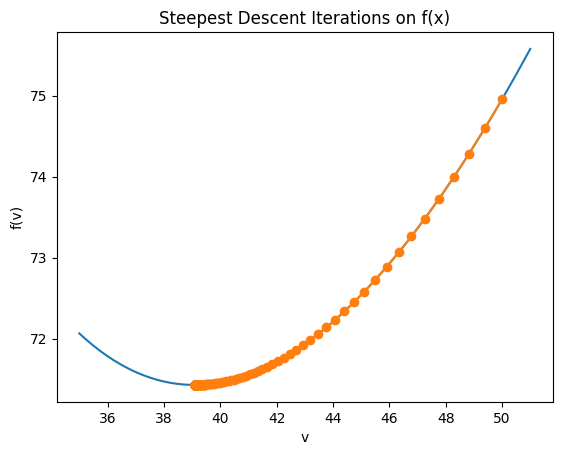

optimal speed:  39.087982186268945
number of iterations:  190


In [79]:
x_vals = np.linspace(35,51,200)
y_vals = f(x_vals)
plt.plot(x_vals,y_vals)
y = [f(x) for x in path_sd]
plt.plot(path_sd,y,marker='o')
plt.xlabel('v')
plt.ylabel('f(v)')
plt.title("Steepest Descent Iterations on f(x)")
plt.show()

print('optimal speed: ',x_optimal_sd)
print('number of iterations: ',k_sd)

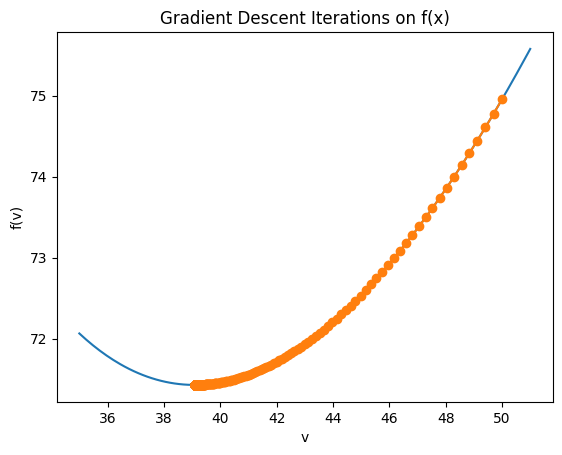

optimal speed:  39.08798257513176
number of iterations:  387


In [80]:
plt.plot(x_vals,y_vals)
y = [f(x) for x in path_gd]
plt.plot(path_gd,y,marker='o')
plt.xlabel('v')
plt.ylabel('f(v)')
plt.title("Gradient Descent Iterations on f(x)")
plt.show()

print('optimal speed: ',x_optimal_gd)
print('number of iterations: ',k_gd)